In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../../main/python'))

In [3]:
import pandas as pd

import thalesians.tsa.conversions as conv
import thalesians.tsa.finance as finance
import thalesians.tsa.pandasutils as pdutils
import thalesians.tsa.visual as visual

import thalesians.tsa.datasets.finratrace as finratrace

In [4]:
data_file_path = 'S:/Dropbox/fifteen-us-companies-trace-bond-trades.zip'
first_report_date = conv.str_to_date('2015.01.01')
last_report_date = conv.str_to_date('2015.12.31')

In [5]:
df = finratrace.load_df_from_file(
        data_file_path,
        cusip='060505DP6',
        first_report_date=first_report_date,
        last_report_date=last_report_date)

In [6]:
len(df)

3234

In [6]:
def convert_ascii_rptd_vol_tx(s):
    try: return float(s)
    except:
        if s == '': return float('nan')
        elif s == '1MM+': return 1000000
        elif s == '5MM+': return 5000000
        else: raise ValueError('Unexpected value: "%s"' % str(s))
            
pdutils.convert_df_columns(df, {'ascii_rptd_vol_tx': convert_ascii_rptd_vol_tx}, in_place=True);

In [7]:
pdutils.detect_df_column_types(df, convert=True, in_place=True)

{'ATS_indicator': str,
 'ascii_rptd_vol_tx': dtype('float64'),
 'asof_cd': str,
 'bond_sym_id': str,
 'bsym': str,
 'chng_cd': int,
 'cmsn_trd': str,
 'company_symbol': str,
 'contra_party_type': str,
 'cusip_id': str,
 'days_to_sttl_ct': str,
 'diss_rptg_side_cd': str,
 'frmt_cd': str,
 'function': str,
 'high_yld_pt': float,
 'high_yld_sign_cd': str,
 'low_yld_pt': float,
 'low_yld_sign_cd': str,
 'lsal_yld_pt': float,
 'lsal_yld_sign_cd': str,
 'msg_seq_nb': int,
 'orig_dis_dt': datetime.date,
 'orig_msg_seq_nb': int,
 'remuneration': str,
 'rptd_high_pr': float,
 'rptd_last_pr': float,
 'rptd_low_pr': float,
 'rptd_pr': float,
 'rptg_party_type': str,
 'sale_cndtn2_cd': str,
 'sale_cndtn_cd': str,
 'side': str,
 'spcl_trd_fl': str,
 'sttl_dt': datetime.date,
 'sub_prd_type': str,
 'trans_dt': datetime.date,
 'trc_st': str,
 'trd_exctn_dt': datetime.date,
 'trd_exctn_tm': datetime.time,
 'wis_fl': str,
 'yld_pt': float,
 'yld_sign_cd': str}

In [8]:
pdutils.get_column_types(df)

OrderedDict([('cusip_id', str),
             ('bond_sym_id', str),
             ('company_symbol', str),
             ('bsym', str),
             ('trd_exctn_dt', datetime.date),
             ('trd_exctn_tm', datetime.time),
             ('sub_prd_type', str),
             ('trans_dt', datetime.date),
             ('msg_seq_nb', dtype('int64')),
             ('trc_st', str),
             ('wis_fl', str),
             ('cmsn_trd', str),
             ('remuneration', str),
             ('ascii_rptd_vol_tx', dtype('float64')),
             ('frmt_cd', str),
             ('rptd_pr', dtype('float64')),
             ('yld_sign_cd', str),
             ('yld_pt', dtype('float64')),
             ('asof_cd', str),
             ('days_to_sttl_ct', str),
             ('sale_cndtn_cd', str),
             ('sale_cndtn2_cd', str),
             ('spcl_trd_fl', str),
             ('diss_rptg_side_cd', str),
             ('side', str),
             ('chng_cd', dtype('int64')),
             ('rptd_high_p

In [9]:
df['trd_exctn_dttm'] = pd.to_datetime(pdutils.combine_date_time(df, 'trd_exctn_dt', 'trd_exctn_tm'))

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


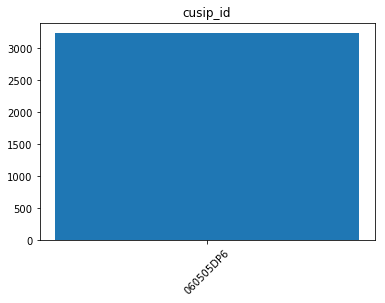

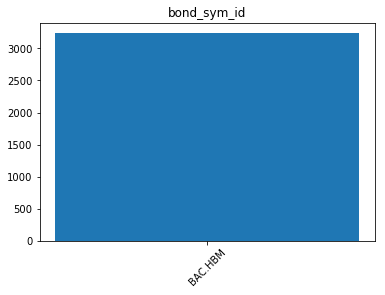

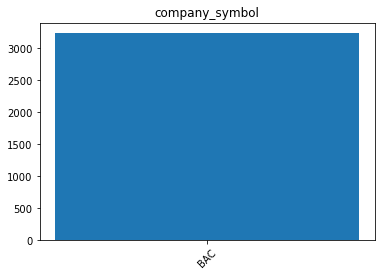

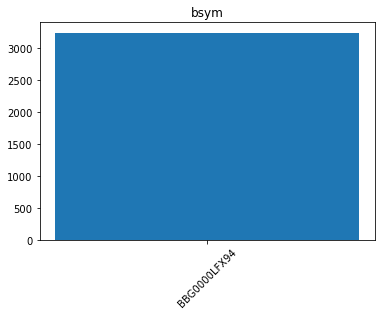

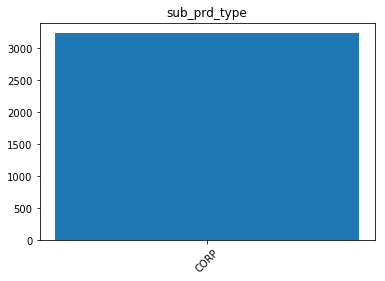

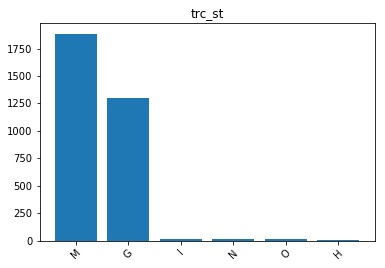

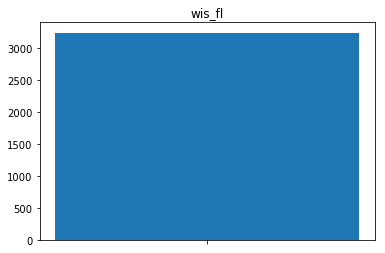

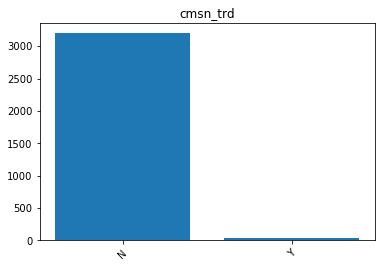

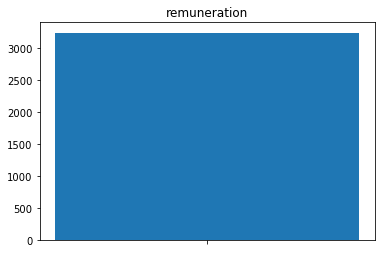

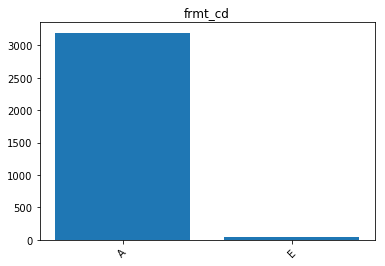

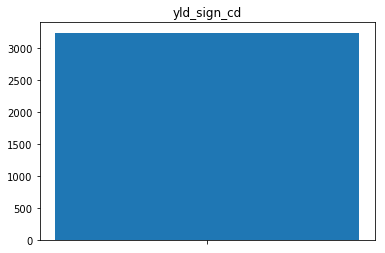

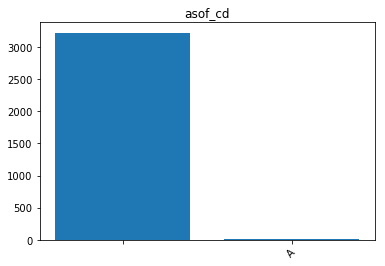

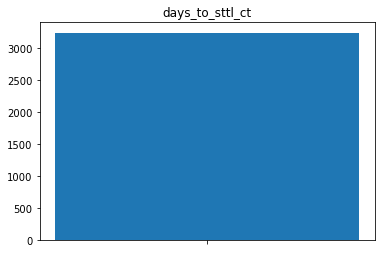

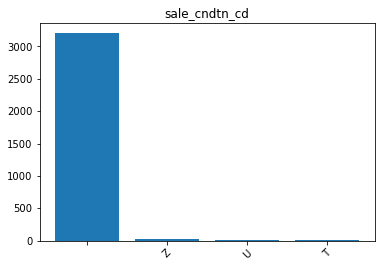

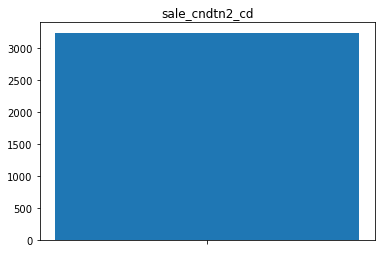

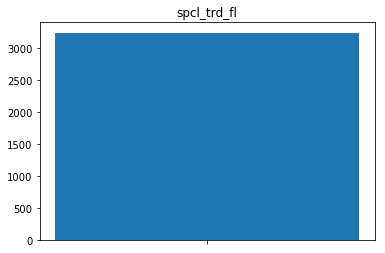

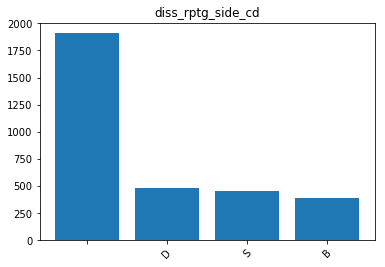

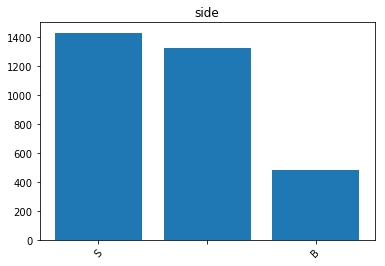

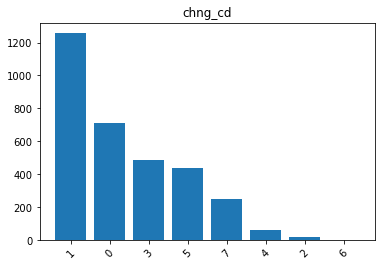

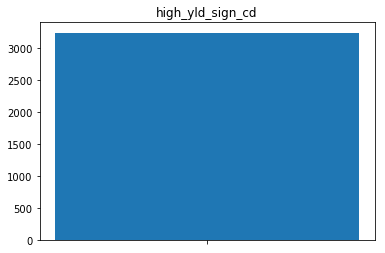

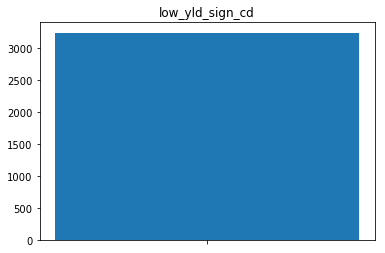

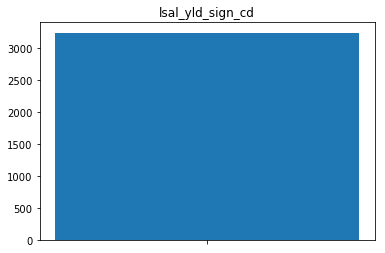

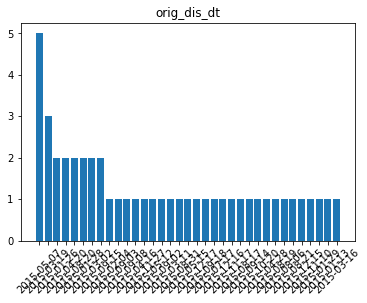

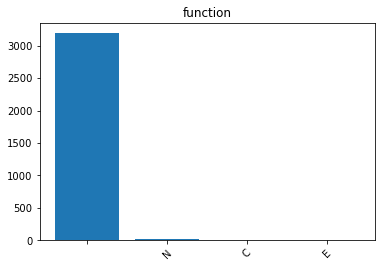

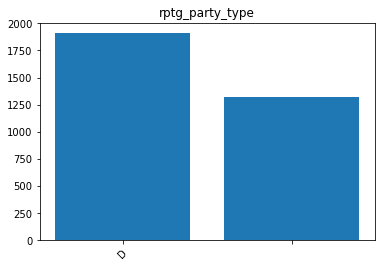

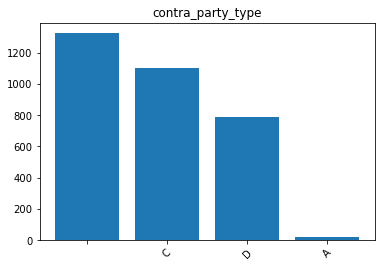

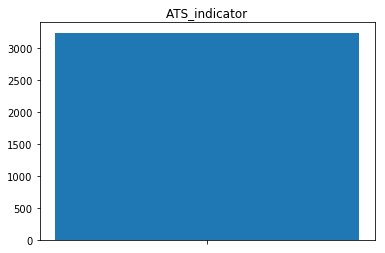

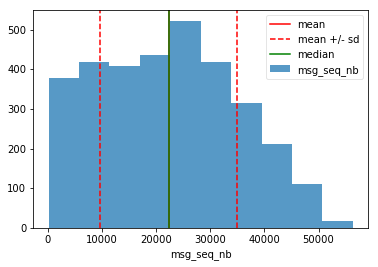

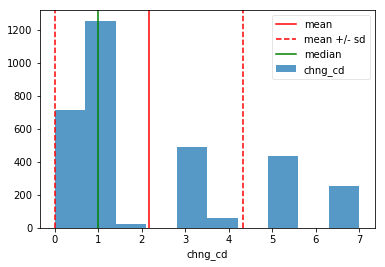

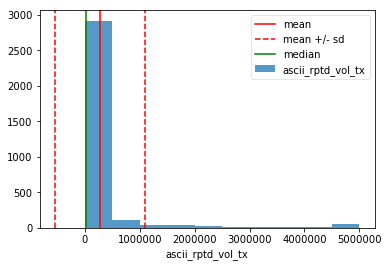

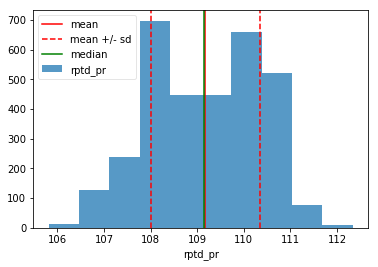

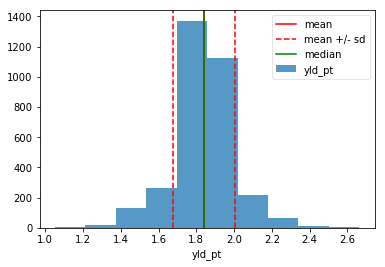

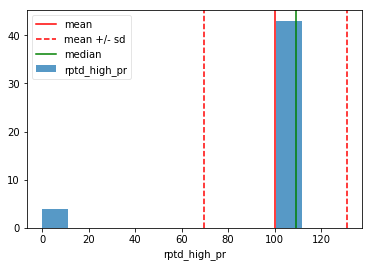

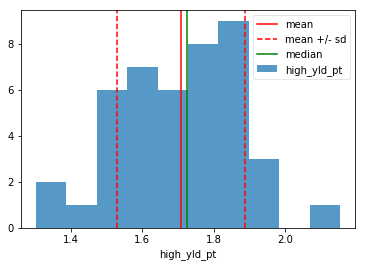

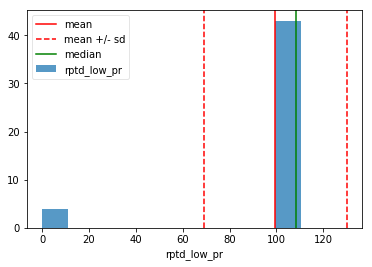

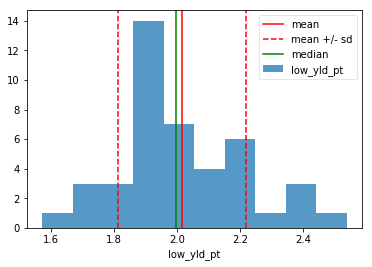

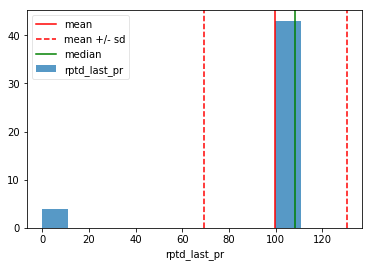

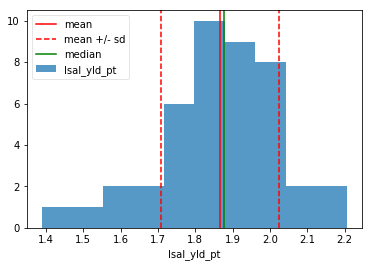

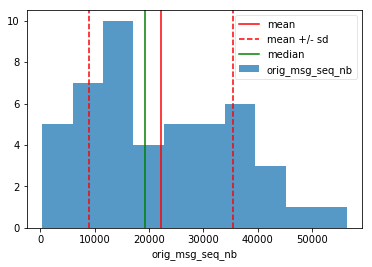

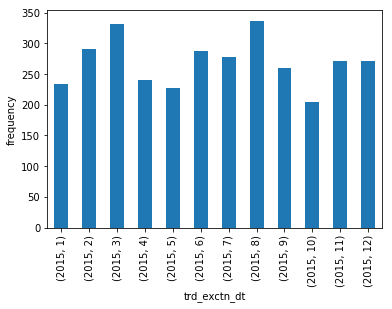

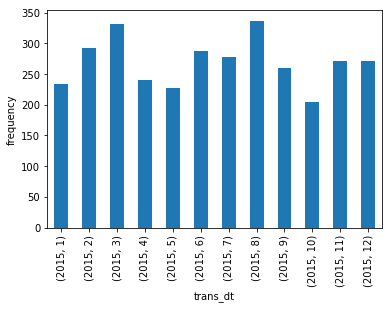

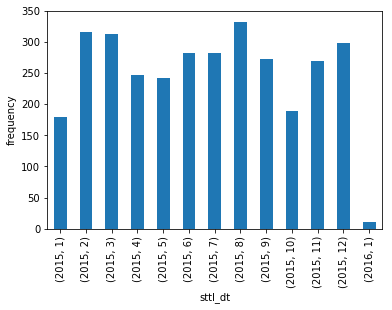

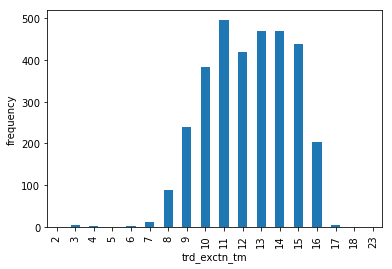

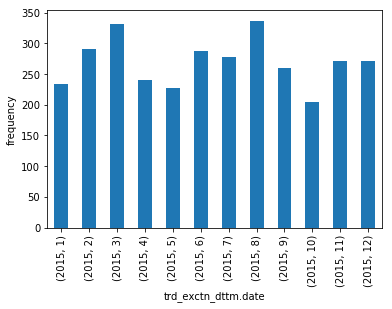

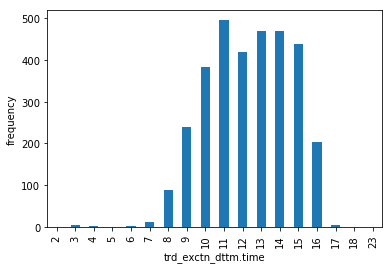

In [10]:
visual.visualise_df(df)

In [11]:
def visualise_trace_df(df):
    fig, ax = visual.visualise_df_sized_point_series(df[(df['contra_party_type'] == 'C') & (df['side'] == 'B')], 'trd_exctn_dttm', 'rptd_pr', 'ascii_rptd_vol_tx', scaling=finance.usd_trade_size_scaling, color='green')
    visual.visualise_df_sized_point_series(df[(df['contra_party_type'] == 'C') & (df['side'] == 'S')], 'trd_exctn_dttm', 'rptd_pr', 'ascii_rptd_vol_tx', fig=fig, ax=ax, scaling=finance.usd_trade_size_scaling, color='red')
    visual.visualise_df_sized_point_series(df[(df['contra_party_type'] == 'D') & (df['side'] == 'S')], 'trd_exctn_dttm', 'rptd_pr', 'ascii_rptd_vol_tx', fig=fig, ax=ax, scaling=finance.usd_trade_size_scaling, color='blue')

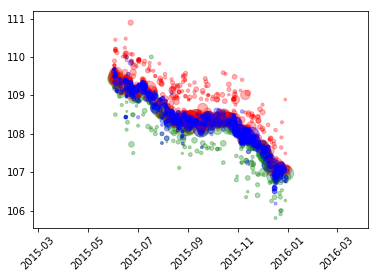

In [12]:
visualise_trace_df(df)